# Współczesne metody heurystyczne
## PB14 - Wykorzystanie algorytmu ewolucyjnego do doboru parametrów SVM do zadania klasyfikacji
### Agnieszka Czaplicka, Bartosz Sowul

# test: instalacja potrzebnych modułów

In [9]:
!pip install pathos
!pip install tqdm
!pip install matplotlib
!pip install pandas
!pip install numexpr
!pip install numpy
!pip install scikit_learn

## test: czy jupyter widzi nasz moduł?

Generation:   0%|          | 0/5 [00:00<?, ?it/s]

Base score: -0.13287005762377702



gen: 5
avg time per gen: 0.4
Best params:
C: 0.8901398886123515
Gamma: 0.38830015971520454
neg_log_loss: -0.12005693848167892



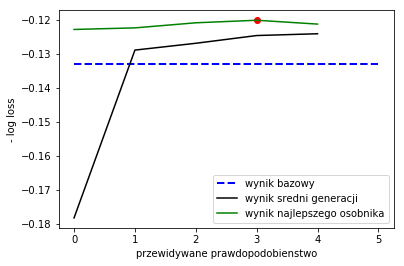

In [46]:
from ga.evoalgo_svm import EvoAlgo

from sklearn.datasets import load_iris
from sklearn.svm import SVC

clf = SVC(kernel='rbf', probability=True, C=1.0, gamma='auto')
ea = EvoAlgo(clf, pop_members=60, max_iter=5)
iris = load_iris()
ea.fit(iris.data, iris.target)

ea.get_params()
ea.plot()

## Ładowanie danych

In [44]:
import numpy as np
from collections import OrderedDict


class DataSet:
    def __init__(self, data, target):
        self.data = data
        self.target = target


def load_data(name, concatenate_classes=False):
    filename = "./../data/rs_training_" + name + "_no_headers.txt"
    data = np.loadtxt(filename)
    train = DataSet(data[:, :np.shape(data)[1] - 1], data[:, np.shape(data)[1] - 1])
        
    filename = "./../data/rs_testing_" + name + "_no_headers.txt"
    data = np.loadtxt(filename)
    print(np.shape(data))
    test = DataSet(data[:, :np.shape(data)[1] - 1], data[:, np.shape(data)[1] - 1])
    
    # przeksztalcenie danych do zakresu [-1,1]
    max_train = np.amax(train.data, axis=0)
    min_train = np.amin(train.data, axis=0)
    train.data = 2 * (train.data - min_train) / (max_train - min_train) - 1
    test.data = 2 * (test.data - min_train) / (max_train - min_train) - 1
    
    if concatenate_classes == True:
        train.target = (np.around(train.target / 10)) * 10
        test.target = (np.around(test.target / 10)) * 10
    
    target_list = sorted(list(OrderedDict.fromkeys(train.target)))
    print(list(map(int, target_list)))
    
    return train, test
  

train, test = load_data('tani', True)
print('Train:')
print(train.data[5, :])
print(train.target[5])
print('\nTest:')
print(test.data[5, :])
print(test.target[5])

(102, 37)
[-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60]
Train:
[ 0.02466793  0.02466793  0.2019061   0.02466793  0.02466793 -0.20191195
  0.02466793  0.02466793  0.20191055  0.00071994  0.04210526  0.16868381
  0.06803131  0.08515815 -0.25231478  0.09891435  0.10382514  0.25722737
  0.16972814  0.21500722  0.17168869  0.25104022  0.25801953 -0.2024012
  0.26880223  0.26564673  0.20206982  0.00071994  0.04210526  0.16868384
  0.06803131  0.08515815 -0.25231478  0.09891435  0.10382514  0.25722738]
-10.0

Test:
[ 0.12333966  0.12144213  0.29813691  0.12333966  0.12144213 -0.29814314
  0.12333966  0.12144213  0.29814163  0.06983441  0.10789474  0.23810495
  0.13064419  0.14841849 -0.32388161  0.16164053  0.16575592  0.3294971
  0.24467303  0.28860029  0.26601474  0.32316227  0.32914923 -0.29859227
  0.33983287  0.33657858  0.29829273  0.06983441  0.10789474  0.23810498
  0.13064419  0.14841849 -0.32388162  0.16164053  0.16575592  0.3294971 ]
10.0


## Testowanie programu

In [55]:
from ga.evoalgo_svm import EvoAlgo

from sklearn.svm import SVC


def test_EA(train, test, pop_members, max_iter):
    C = np.zeros((np.shape(pop_members)[0], np.shape(max_iter)[0]))
    gamma = np.zeros((np.shape(pop_members)[0], np.shape(max_iter)[0]))
    log_loss = np.zeros((np.shape(pop_members)[0], np.shape(max_iter)[0]))
    clf_train = SVC(kernel='rbf', probability=True, C=1.0, gamma='auto')
    for pop in range(np.shape(pop_members)[0]):
        for it in range(np.shape(max_iter)[0]):
            ea = EvoAlgo(clf_train, pop_members=pop, max_iter=it)
            ea.fit(train.data, train.target)
            C[pop, it], gamma[pop, it] = ea.get_params() #[TO DO] dopisać do get_params return
            ea.plot()
            
            clf_test = SVC(kernel='rbf', probability=True, C=C[pop, it], gamma=gamma[pop, it])
            y_pred = clf_test.predict(test.data)
            log_loss[pop, it] = sklearn.metrics.log_loss(test.target, y_pred)
    
    return C, gamma, log_loss


train, test = load_data('drogi', True)
pop_members = [10, 20, 50, 100, 200]
max_iter = [1, 5, 10, 15, 20]
C, gamma, log_loss = test_EA(train, test, pop_members, max_iter)
print('\nWyniki na zbiorze testowym:\n', C, gamma, log_loss)

(102, 37)
[-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60]
Base score: -2.4480663979615747

gen: 0


ZeroDivisionError: division by zero

## Open In Colab Badge

Anybody can open a copy of any github-hosted notebook within Colab. To make it easier to give people access to live views of GitHub-hosted notebooks,
colab provides a [shields.io](http://shields.io/)-style badge, which appears as follows:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

The markdown for the above badge is the following:

```markdown
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
```

The HTML equivalent is:

```HTML
<a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
```

Remember to replace the notebook URL in this template with the notebook you want to link to.